In [66]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [10]:
pop = pd.read_html("https://en.wikipedia.org/wiki/List_of_countries_and_dependencies_by_population")[0]

In [ ]:
pop.drop(columns=["Unnamed: 0","Unnamed: 6"],inplace=True)
pop.reset_index(inplace=True)

In [14]:
pop.head(5)

,Country / Dependency,Population,% of world,Date,Source (official or from the United Nations)
0,World,8074600000,100%,30 Nov 2023,UN projection[3]
1,China,1411750000,17.5%,31 Dec 2022,Official estimate[4]
2,India,1392329000,17.2%,1 Mar 2023,Official projection[5]
3,United States,334233854,4.1%,1 Jan 2023,Official estimate[7]
4,Indonesia,279118866,3.5%,1 Jul 2023,National annual projection[8]


In [23]:
gdp = pd.read_html("https://en.wikipedia.org/wiki/List_of_countries_by_GDP_(nominal)_per_capita")[1]

In [24]:
gdp.drop(columns=[            (        'IMF[4][5]',          'Estimate'),
            (        'IMF[4][5]',              'Year'),],inplace=True)

In [47]:
gdp.columns

MultiIndex([('Country/Territory', 'Country/Territory'),
            (        'UN Region',         'UN Region'),
            (    'World Bank[6]',          'Estimate'),
            (    'World Bank[6]',              'Year'),
            ('United Nations[7]',          'Estimate'),
            ('United Nations[7]',              'Year')],
           )

In [60]:
gdpun  = pd.DataFrame(np.array(gdp[[('Country/Territory', 'Country/Territory'),
            (    'World Bank[6]',          'Estimate')]]))

In [62]:
gdpun[1]

0         NaN
1      234317
2      184083
3      126426
4      118846
        ...  
219       505
220      1072
221       461
222       364
223       238
Name: 1, Length: 224, dtype: object

In [113]:
finalData = pop.merge(gdpun, how='inner', left_on="Country / Dependency", right_on=0)
def toInt(x):
    try:
        return int(x)
    except:
        return None
finalData[1] = finalData[1].apply(lambda x: toInt(x))
finalData["Population"] = finalData["Population"].apply(lambda x: toInt(x))

In [114]:
finalData = finalData[finalData["Population"]<=7000000]

In [162]:
finalData[finalData["Country / Dependency"]=="Singapore"]

,Country / Dependency,Population,% of world,Date,Source (official or from the United Nations),0,1
114,Singapore,5917600,0.07%,30 Jun 2023,Official estimate[117],Singapore,82808.0


Text(0, 0.5, 'GDP per capita by UN data')

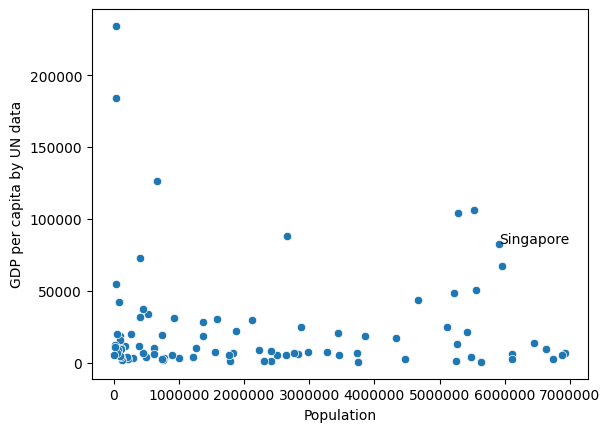

In [172]:
# f, axs = plt.subplots(1, 2, figsize=(10, 6), gridspec_kw=dict(width_ratios=[4, 3]))
plt.figsize=(10, 6)
ax = sns.scatterplot(data=finalData,x="Population",y=1)
ax.get_xaxis().get_major_formatter().set_scientific(False)
plt.text(5917600,83000,"Singapore") 
plt.ylabel("GDP per capita by UN data")
# plt.xticks(np.arange(0, 7000000, step=1000000))  